# Python Data Analysis practice - 2024/01/23

In [1]:
import gdown
gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet = False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 94.2MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory = False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [3]:
count_by_year = ns_book7['발행년도'].value_counts() # 발행 년도이 등장횟수를 계산. 값을 기준으로 내림차순 정렬한다.
count_by_year

2012    18601
2014    17797
2009    17611
2011    17523
2010    17503
        ...  
2650        1
2108        1
2104        1
2560        1
1947        1
Name: 발행년도, Length: 87, dtype: int64

In [4]:
count_by_year = count_by_year.sort_index() # 오름차순 정렬 - 인덱스(발행년도) 순서대로
count_by_year

1947     1
1948     1
1949     1
1952    11
1954     1
        ..
2551     1
2552     2
2559     1
2560     1
2650     1
Name: 발행년도, Length: 87, dtype: int64

In [5]:
count_by_year = count_by_year[count_by_year.index <= 2030] #인덱스가 2030년보다 작거나 같은 값만 추출
count_by_year

1947        1
1948        1
1949        1
1952       11
1954        1
        ...  
2020    11834
2021     1255
2025        1
2028        1
2030        1
Name: 발행년도, Length: 68, dtype: int64

In [6]:
import numpy as np


def kdc_1st_char(no):
  if no is np.nan:
    return '-1'
  else:
    return no[0]

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts() #명목형 데이터, 순서가 없다. 어떤 분류인지를 나타내는 숫자일 뿐.
count_by_subject

8     108643
3      80767
5      40916
9      26375
6      25070
1      22647
-1     16978
7      15836
4      13688
2      13474
0      12376
Name: 주제분류번호, dtype: int64

## 선 그래프 그리기

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

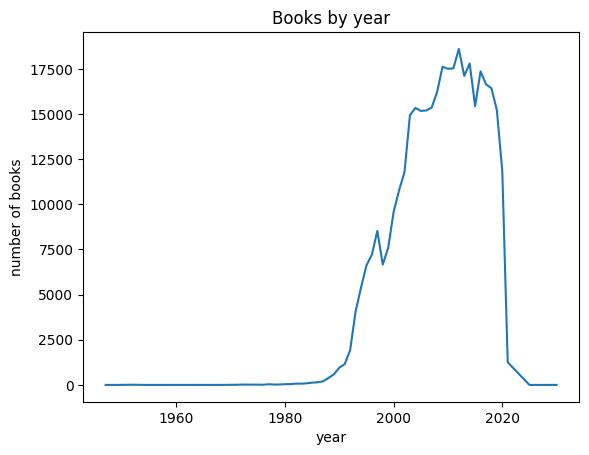

In [8]:
plt.plot(count_by_year.index, count_by_year.values)
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

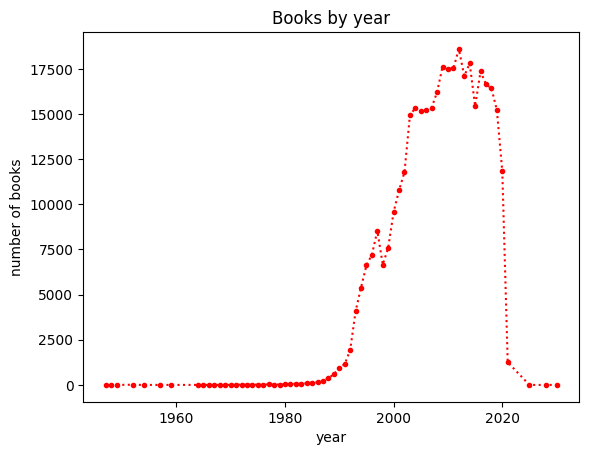

In [11]:
plt.plot(count_by_year, marker='.', linestyle = ':', color = 'red')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

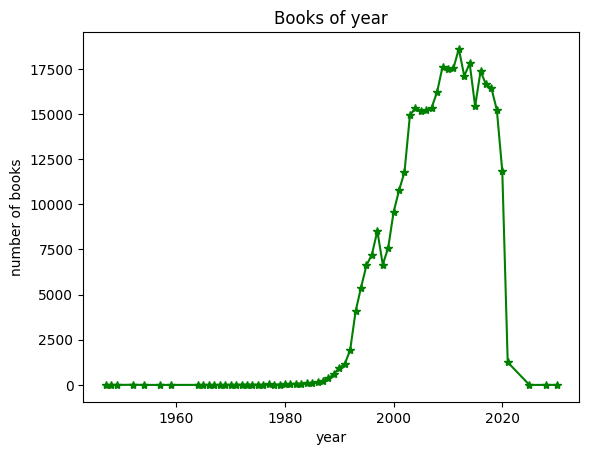

In [12]:
plt.plot(count_by_year, '*-g') # *모양 marker, -:실선, g : 초록색
plt.title('Books of year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.show()

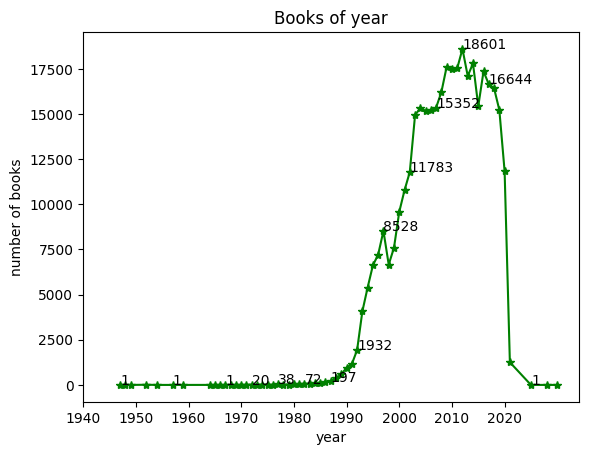

In [14]:
plt.plot(count_by_year, '*-g') # *모양 marker, -:실선, g : 초록색
plt.title('Books of year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1940,2030, 10)) # 1940년도부터 2030년도 범위 (2030년은 미포함) 10년 단위로 값을 출력.
for idx, val in count_by_year[::5].items(): # 5개씩 건너 뛰면서 5년 단위로 그래프에 값을 표시함.
  plt.annotate(val, (idx, val)) # val이 그래프에 나타날 문자열, (idx, val)이 그래프에서 val이 나타날 위치.
plt.show()

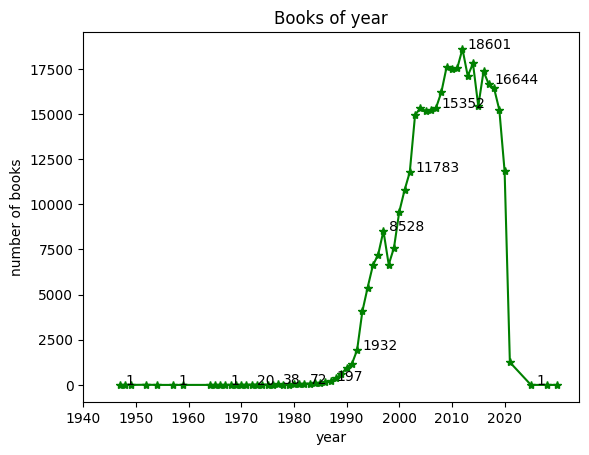

In [15]:
plt.plot(count_by_year, '*-g') # *모양 marker, -:실선, g : 초록색
plt.title('Books of year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1940,2030, 10)) # 1940년도부터 2030년도 범위 (2030년은 미포함) 10년 단위로 값을 출력.
for idx, val in count_by_year[::5].items(): # 5개씩 건너 뛰면서 5년 단위로 그래프에 값을 표시함.
  plt.annotate(val, (idx, val), xytext = (idx+1, val+10)) # val이 그래프에 나타날 문자열, (idx, val)이 그래프에서 val이 나타날 위치 x축으로 1, y축으로 10만큼 떨어지도록.
plt.show()

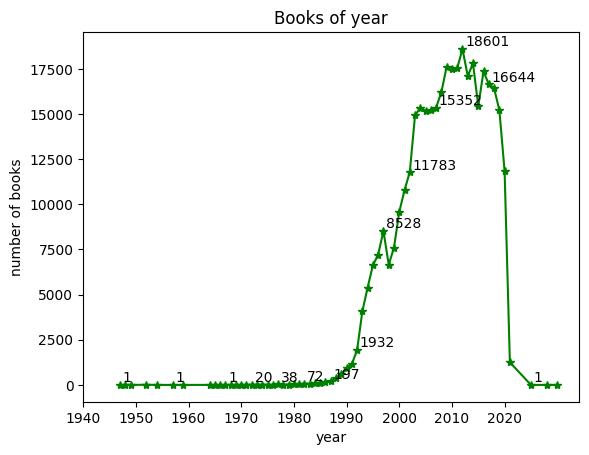

In [16]:
plt.plot(count_by_year, '*-g') # *모양 marker, -:실선, g : 초록색
plt.title('Books of year')
plt.xlabel('year')
plt.ylabel('number of books')
plt.xticks(range(1940,2030, 10)) # 1940년도부터 2030년도 범위 (2030년은 미포함) 10년 단위로 값을 출력.
for idx, val in count_by_year[::5].items(): # 5개씩 건너 뛰면서 5년 단위로 그래프에 값을 표시함.
  plt.annotate(val, (idx, val), xytext = (2,2), textcoords = 'offset points') # val이 그래프에 나타날 문자열, (idx, val)이 그래프에서 val이 나타날 위치 픽셀 단위로 지정
plt.show()

## 막대그래프 그리기

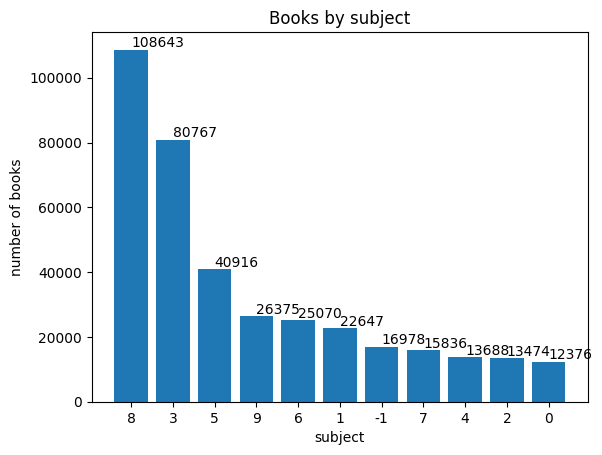

In [17]:
plt.bar(count_by_subject.index, count_by_subject.values) #막대그래프
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext = (0,2), textcoords = 'offset points')
plt.show()

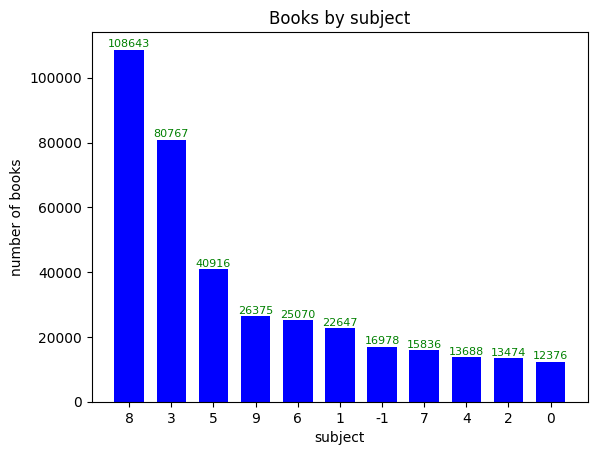

In [18]:
plt.bar(count_by_subject.index, count_by_subject.values, width = 0.7, color = 'blue') # 너비, 막대 색 조절
plt.title('Books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
  plt.annotate(val, (idx, val), xytext = (0,2), textcoords = 'offset points', fontsize = 8, ha = 'center', color = 'green') # 글자 크기 조절, 글자 가운데 정렬, 색 초록색
plt.show()

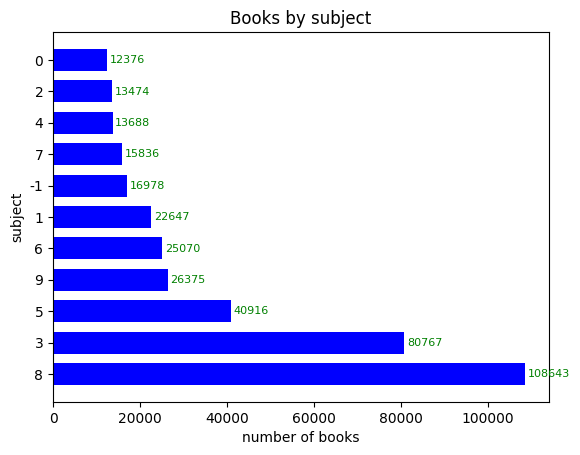

In [22]:
plt.barh(count_by_subject.index, count_by_subject.values, height = 0.7, color = 'blue') # 너비가 아니라 높이
plt.title('Books by subject')
plt.xlabel('number of books') #x,y축 바꾸기
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  plt.annotate(val, (val, idx), xytext = (2,0), textcoords = 'offset points', fontsize = 8, va = 'center', color = 'green') # ha대신 va로 조절, (val, idx)로 순서 바꾸기. (2,0)으로 바꾸기
plt.show()

## 이미지 출력과 그래프 이미지 저장

In [27]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    # 샘플 이미지를 다운로드합니다.
    !wget https://bit.ly/3wrj4xf -O jupiter.png

--2024-01-23 12:57:45--  https://bit.ly/3wrj4xf
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png [following]
--2024-01-23 12:57:45--  https://raw.githubusercontent.com/rickiepark/hg-da/main/jupiter.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3287363 (3.1M) [image/png]
Saving to: ‘jupiter.png’

jupiter.png         100%[===================>]   3.13M  --.-KB/s    in 0.07s   

2024-01-23 12:57:46 (43.8 MB/s) - ‘jupiter.png’ saved [3287363/3287363]



In [28]:
img = plt.imread('jupiter.png')
img.shape

(1561, 1646, 3)

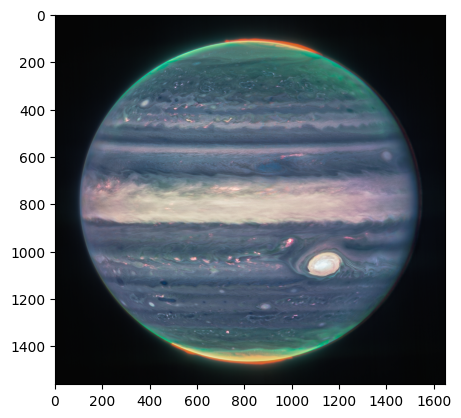

In [29]:
plt.imshow(img)
plt.show()b #이미지 보여주기

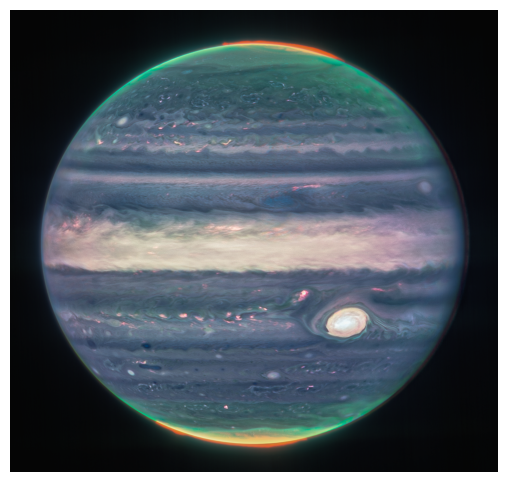

In [30]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off') # 눈금 없애기
plt.show()

In [31]:
plt.imsave('jupiter.jpg', arr = img) #이미지를 jpg로 저장

In [36]:
from PIL import Image #Pillow 패키지 import - 아니 근데 맷플롯립 설치를 했는데 왜 얘 설치 안하니까 안되는거지.....

In [32]:
plt.rcParams['savefig.dpi']

'figure'

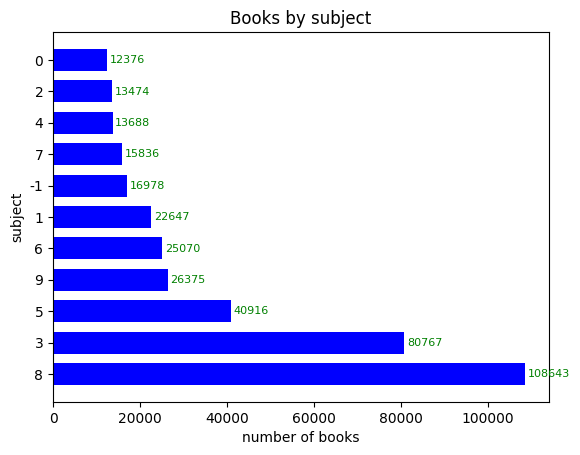

In [33]:
plt.barh(count_by_subject.index, count_by_subject.values, height = 0.7, color = 'blue') # 너비가 아니라 높이
plt.title('Books by subject')
plt.xlabel('number of books') #x,y축 바꾸기
plt.ylabel('subject')
for idx, val in count_by_subject.items():
  plt.annotate(val, (val, idx), xytext = (2,0), textcoords = 'offset points', fontsize = 8, va = 'center', color = 'green') # ha대신 va로 조절, (val, idx)로 순서 바꾸기. (2,0)으로 바꾸기
plt.savefig('books_by_subject.png')
plt.show()

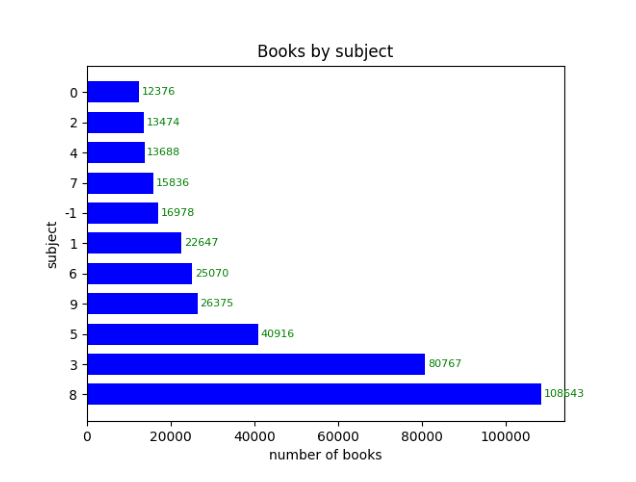

In [37]:
pil_img = Image.open('books_by_subject.png')

plt.figure(figsize=(8,6))
plt.imshow(pil_img)
plt.axis('off')
plt.show()